In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [45]:
%store -r data

In [46]:
data = data.sample(n = 8000)
X = data.drop(' shares', axis = 1)
Y = data[' shares']

In [47]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [48]:
X_normalized = normalize(X)
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_normalized)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['C1', 'C2']
X_pca

,C1,C2
0,-0.071356,0.231775
1,-0.101527,0.160619
2,-0.097866,0.287493
3,-0.089529,-0.339842
4,-0.088554,-0.210476
...,...,...
7995,-0.090129,-0.102462
7996,0.214176,0.058479
7997,-0.111198,-0.304121
7998,0.327813,-0.068317


In [49]:
knn = NearestNeighbors(n_neighbors = 4).fit(X)
neigh_dist, neigh_ind = knn.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

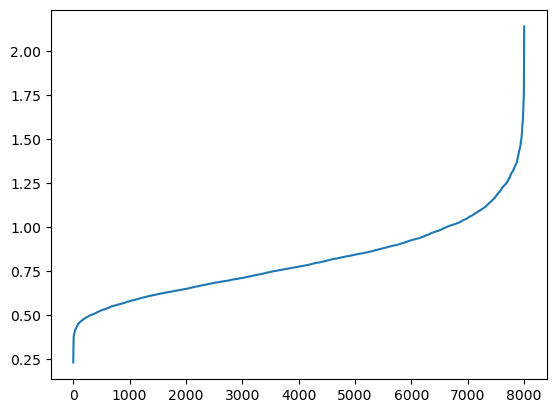

In [50]:
k_dist = sort_neigh_dist[:, 3]
plt.plot(k_dist)
plt.show()

In [51]:
knee = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online = True)
print(knee.knee_y)
eps = knee.knee_y

1.5596098050596077


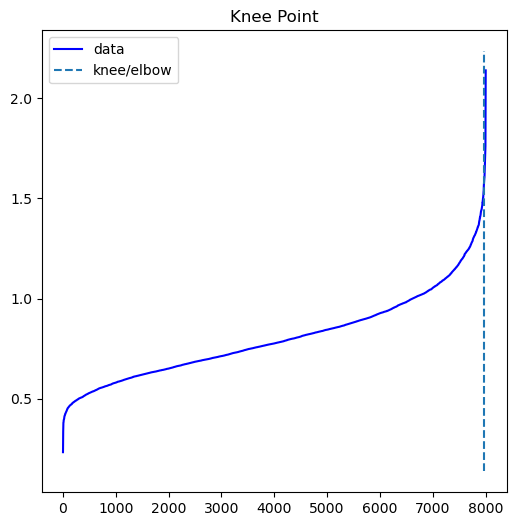

In [52]:
knee.plot_knee()
plt.show()

In [53]:
db = DBSCAN(eps = eps, min_samples = 4).fit(X)

In [54]:
print(set(db.labels_))
Counter(db.labels_) # value of -1 represents noise
print(silhouette_score(X, db.labels_))

{0, 1, 2, 3, -1}
0.1159783093590599


<AxesSubplot:xlabel='C1', ylabel='C2'>

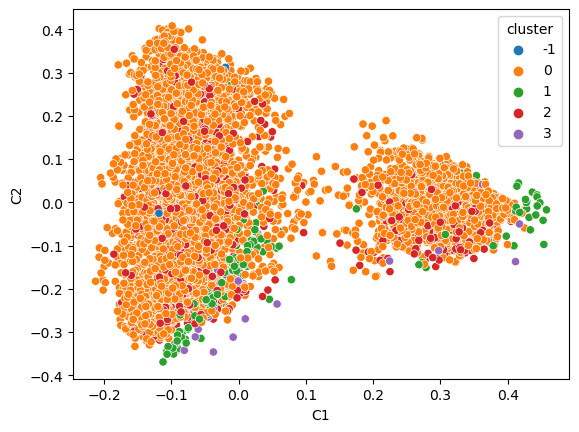

In [55]:
X_pca['cluster'] = pd.Categorical(db.labels_)
sns.scatterplot(x = "C1", y = "C2", hue = "cluster", data = X_pca)

In [60]:
best_score = float('-inf')
best_model = None
eps_values = [1.4, 1.6, 1.8, 1.9, 2, 2.5, 3, 4]

for eps in eps_values:
    for min_samples in range(2, 11):
        model = DBSCAN(eps = eps, min_samples = min_samples)
        
        model.fit(X)
        
        if(len(set(model.labels_)) == 1):
            continue
        
        score = silhouette_score(X, model.labels_)
            
        if score > best_score:
            best_score = score
            best_model = model
        
        print(f'{min_samples}, {eps} -> {score}')

2, 1.4 -> 0.17686123806862442
3, 1.4 -> 0.17875626760263594
4, 1.4 -> 0.1789577007616472
5, 1.4 -> 0.18061854828819182
6, 1.4 -> 0.18042964590274807
7, 1.4 -> 0.1803852089847186
8, 1.4 -> 0.1802495241337329
9, 1.4 -> 0.17958364928743106
10, 1.4 -> 0.17948070656285664
2, 1.6 -> 0.11598468356543913
3, 1.6 -> 0.11598468356543913
4, 1.6 -> 0.11598468356543913
5, 1.6 -> 0.11598468356543913
6, 1.6 -> 0.11598468356543913
7, 1.6 -> 0.11582174321462377
8, 1.6 -> 0.1157202812184297
9, 1.6 -> 0.1157202812184297
10, 1.6 -> 0.11566186314016567
2, 1.8 -> 0.22833825195971996
3, 1.8 -> 0.22833825195971996
4, 1.8 -> 0.22833825195971996
5, 1.8 -> 0.22833825195971996
6, 1.8 -> 0.22833825195971996
7, 1.8 -> 0.22833825195971996
8, 1.8 -> 0.22833825195971996
9, 1.8 -> 0.22833825195971996
10, 1.8 -> 0.22833825195971996
2, 1.9 -> 0.18431154081422296
3, 1.9 -> 0.18431154081422296
4, 1.9 -> 0.18431154081422296
5, 1.9 -> 0.18431154081422296
6, 1.9 -> 0.18431154081422296
7, 1.9 -> 0.18431154081422296
8, 1.9 -> 0.

In [61]:
print(best_score)
print(best_model)

0.22833825195971996
DBSCAN(eps=1.8, min_samples=2)


<AxesSubplot:xlabel='C1', ylabel='C2'>

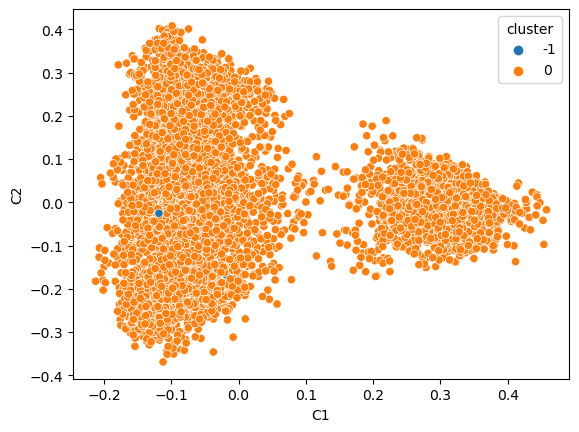

In [62]:
X_pca['cluster'] = pd.Categorical(best_model.labels_)
sns.scatterplot(x = "C1", y = "C2", hue = "cluster", data = X_pca)

In [63]:
%store db
db2 = best_model
%store db2

Stored 'db' (DBSCAN)
Stored 'db2' (DBSCAN)
